In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, backend
from tensorflow.keras.layers import Activation
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

In [24]:
def custom_activation_function(x): # tanh activation function. This is a modification.
  return (tf.exp(x) - tf.exp(-x))/(tf.exp(x) + tf.exp(-x))

In [25]:
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation=Activation(custom_activation_function), input_shape=(10,)),
        layers.Dense(20, activation=Activation(custom_activation_function)),
        layers.Dense(1)
    ])

    return model

In [26]:
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  history = []

  for epoch in range(epochs):
    hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
    loss = hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} Loss:{loss:.4f}")

  return history


In [27]:
X, y = create_data()
model_sgd = create_model()
model_adam = create_model()

In [28]:
optimizer_sgd = optimizers.SGD(learning_rate = 0.01)
optimizer_adam = optimizers.Adam(learning_rate = 0.001)

epochs = 50
batch_size = 32

In [29]:
print("\nTraining with SGD optimizer:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer:")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')


Training with SGD optimizer:
Epoch 1/50 - SGD Loss:1.1509
Epoch 2/50 - SGD Loss:1.0469
Epoch 3/50 - SGD Loss:1.0359
Epoch 4/50 - SGD Loss:1.0359
Epoch 5/50 - SGD Loss:1.0297
Epoch 6/50 - SGD Loss:1.0292
Epoch 7/50 - SGD Loss:1.0249
Epoch 8/50 - SGD Loss:1.0237
Epoch 9/50 - SGD Loss:1.0228
Epoch 10/50 - SGD Loss:1.0223
Epoch 11/50 - SGD Loss:1.0183
Epoch 12/50 - SGD Loss:1.0151
Epoch 13/50 - SGD Loss:1.0148
Epoch 14/50 - SGD Loss:1.0122
Epoch 15/50 - SGD Loss:1.0073
Epoch 16/50 - SGD Loss:1.0082
Epoch 17/50 - SGD Loss:1.0057
Epoch 18/50 - SGD Loss:1.0041
Epoch 19/50 - SGD Loss:1.0035
Epoch 20/50 - SGD Loss:1.0008
Epoch 21/50 - SGD Loss:1.0007
Epoch 22/50 - SGD Loss:0.9955
Epoch 23/50 - SGD Loss:0.9938
Epoch 24/50 - SGD Loss:0.9918
Epoch 25/50 - SGD Loss:0.9915
Epoch 26/50 - SGD Loss:0.9855
Epoch 27/50 - SGD Loss:0.9849
Epoch 28/50 - SGD Loss:0.9847
Epoch 29/50 - SGD Loss:0.9824
Epoch 30/50 - SGD Loss:0.9784
Epoch 31/50 - SGD Loss:0.9758
Epoch 32/50 - SGD Loss:0.9792
Epoch 33/50 - SGD L

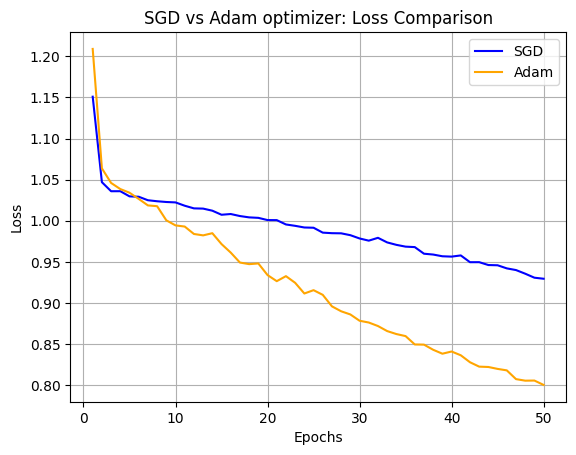

In [30]:
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()